# Task about lakes

This function searches for all lakes that have been formed. It records the start and end indices of each lake and binds them to the height of this lake in the all_lakes dictionary

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def Lakes_indexs(array):
    all_lakes = {}
    indexs = np.array([])
    i = 0
    
    while i < len(array)-1:
        
        
        if array[i] > array[i+1]:
            min_value = None 
            start_element = False
            end_element = False
            
            for j in range(i, len(array)-1):
                if array[j] > array[j+1] and min_value == None:
                    if not start_element:
                        indexs = np.append(indexs, j)
                        start_element = True
                    else:    
                        continue
                
                elif array[j] < array[j+1]:
                    if not min_value:
                        if j+2 == len(array):
                            indexs = np.append(indexs, j+1)
                            end_element = True
                            min_value = array[j]
                            break
                        min_value = array[j]
                        continue
                    else:
                        indexs = np.append(indexs, j+1)
                        end_element = True
                        continue
                
                elif array[j] == array[j+1]:
                    indexs = np.append(indexs, j)
                    indexs = np.append(indexs, j+1)
                    end_element = True
                    continue
                
                elif (array[j] > array[j+1]) and (min_value != None):
                    indexs = np.append(indexs, j)
                    end_element = True
                    break
        
            if end_element and start_element and min_value is not None:
                index_start = int(indexs[0])
                index_end = int(indexs[-1])
                
                key = min(array[index_start] - min_value, array[index_end] - min_value)
                all_lakes.setdefault(key, []).append(indexs.copy())
                
                indexs = np.empty(0)
            
            else:
                break
            i = j
        else:
            i += 1
    
    if not all_lakes:
        all_lakes = "No holes" 
    
    return all_lakes  

### Finding the deepest lake and demonstrating it

array: [96 43 35 53 16 26 96 19  8 16 36 92 27 27 37 43 42 98 86 15]


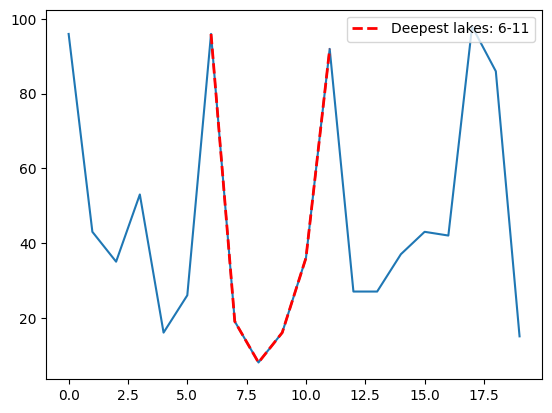

In [16]:
array = np.random.randint(1, 100, 20)
print(f"array: {array}")
values_array = ', '.join(map(str, array))

plt.figure(num=f"array: [{values_array}]")
plt.plot(array)

indexs_lakes = Lakes_indexs(array)

if indexs_lakes == "No holes":
    print(indexs_lakes)
else:
    max_hight = max(indexs_lakes.keys())
    deepest_lakes = indexs_lakes[max_hight]
    
    for indices in deepest_lakes:
        start = int(indices[0])
        end = int(indices[-1])
        plt.plot(range(start, end+1), array[start:end+1], label=f"Deepest lakes: {int(start)}-{int(end)}", marker="", color='red', linewidth=2.0, linestyle='--')
    plt.legend(loc=1)
    plt.show()